# N腕バンディットアルゴリズムのシミュレーション

Sutton and Barto著、三上・皆川訳の強化学習の図2.1のグラフを再現してみる。

## シミュレーション手順

1. `cd ~/rl_sutton`で今回シミュレーションを行うディレクトリに移動する
2. 結果出力用ディレクトリ`output`を作成し、さらに、その下に`exploratory0`、`exploratory0.01`、`exploratory0.1`を作成する
3. `python ./bandit.py`でシミュレーションを実行する
4. このノートブックで結果をグラフにする

## シミュレーションの追加、または、条件変更

`simulate_n_armed_bandit`が各シミュレーションのエントリーポイントになっている。  

|引数|意味|
|:---|:---|
|arm |バンディットの腕の本数|
|exploratory_rate|探索的な方策を選択する確率|
|play|反復1回あたりのプレイ回数|
|iterations|シミュレーションの反復回数|

In [14]:
from pathlib import Path
from matplotlib import pyplot as plt
import pandas as pd
from evaluation import calculate_average_rewards, calculate_average_suitable_action_rate

## データを読み込む

In [3]:
OUTPUT_DIR = 'output/'

In [4]:
average_rewards = pd.DataFrame()
average_suitable_action_rate = pd.DataFrame()
for child_dir in Path(OUTPUT_DIR).iterdir():
    _reward = calculate_average_rewards(child_dir)
    average_rewards = average_rewards.append(_reward)

    _action_rate = calculate_average_suitable_action_rate(child_dir)
    average_suitable_action_rate = average_suitable_action_rate.append(_action_rate)

output/exploratory0.01
output/exploratory0.1
output/exploratory0


## 平均報酬のグラフ

In [ ]:
exploratory_rate_list = sorted(average_rewards.exploratory_rate.unique().tolist())

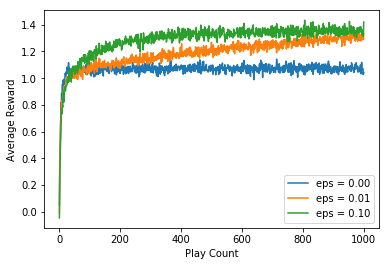

In [18]:
for r in exploratory_rate_list:
    dat = average_rewards.loc[average_rewards.exploratory_rate == r, :]
    plt.plot(dat.play_count.tolist(), dat.average_reward.tolist(), label='eps = {:0.2f}'.format(r))
plt.xlabel('Play Count')
plt.ylabel('Average Reward')
plt.legend(loc='lower right')
plt.savefig('bandit_average_reward.png')
plt.show()

## 行動の最適度のグラフ

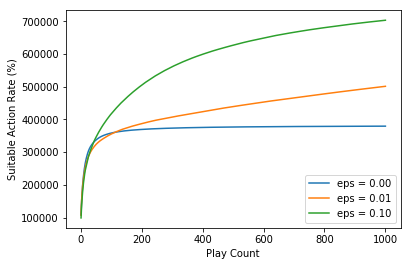

In [19]:
average_suitable_action_rate.average_suitable_action_rate *= 100

for r in exploratory_rate_list:
    dat = average_suitable_action_rate.loc[average_suitable_action_rate.exploratory_rate == r, :]
    plt.plot(dat.play_count.tolist(), dat.average_suitable_action_rate.tolist(), label='eps = {:0.2f}'.format(r))
plt.xlabel('Play Count')
plt.ylabel('Suitable Action Rate (%)')
plt.legend(loc='lower right')
plt.savefig('bandit_suitable_action_rate.png')
plt.show()